# A short Introduction to Open Quantum Systems

### From master equations to exact numerical methods

Neill Lambert, RIKEN, nwlambert@gmail.com

#### Partially based on:
- Ahsan Nazir's Lecture Notes on Open quantum systems https://workspace.imperial.ac.uk/people/Public/anazir1/open_systems_notes.pdf

- "The theory of open quantum systems" by H.-P. Breuer and F. Petruccione.

- Robert Johansson's series of Lectures on QuTiP 
https://github.com/jrjohansson/qutip-lectures

- Uses QuTiP
http://qutip.org/




# Outline:

## Part 1

- Motivation:  from quantum optics and physical chemistry to quantum technologies


- The Lindblad Master equation; a quick derivation



## Part 2


- QuTiP examples and applications

    - Direct integration
    
    - Monte-Carlo simulation


    
## Part 3


- Beyond the Master Equation: Exact numerical methods for bosonic baths

    - The Hierarchy Equations of Motion
    
    - The Reaction Coordinate
    
    
- Conclusions 

## Motivation

Every quantum system inevitably interacts with its environment.  

In general, it is impossible for us to model the whole dynamics of the system and environment.

So the goal of the theory of open quantum systems is to construct minimal solvable models and methods which account for the influence of the environment on the system.


<img src="sys-env.png" height="400" width="400"/>



# The motivation for the study of open quantum systems arises from:

1. **Describing real experiments** involving quantum degrees of freedom in contact with an environment, and real measurements, e.g.,




## Quantum optics
<img src="QED.png" height="400" width="400"/>

## Quantum technologies

<img src="qtech1.png" height="400" width="400"/>

## Physical chemistry and Chemical physics
<img src="fmo.png" height="600" width="600"/>

## Motivation

### 2) **Developing a theory of ``quantum dissipation''** and more recently, quantum thermodynamics.

- E.g., the Caldeira-Leggett model allows us to derive classical dissipation/friction from a quantum foundation



### 3) In **quantum technologies and devices** this is typically an unwanted interaction.  

- If its unavoidable, or even strong, to what degree can we work around it or mitigate it? 

(e.g., using feedback, environment engineering, decoherence free spaces, topological protection)


# Part 1: The Lindblad Master equation; a quick derivation


Steps:

1) A few definitions: density matrix, system and environment (bath) Hamiltonians

2) Born - Markov approximations

3) The bath correlation function

4) An explicit example:  the spin-boson model

5) The secular approximation!

6) And finally, the Lindblad Master Equation

## Definitions: The density operator

When a quantum system is effectively "closed" we describe its dynamics and evolution in terms of a pure state $|\psi(t)\rangle$ whose evolution is determined by a Hamiltonian and the Schrodinger equation

$$\frac{\partial}{\partial t} |\psi(t)\rangle = -i H(t) |\psi(t)\rangle$$

More generally, for open systems it is convenient to use the density operator, which for a pure state, is given by

$$\rho = |\psi(t)\rangle \langle \psi(t)|$$




When describing one part of a larger composite system, as is the case for open systems 
<span style="color:red">when we trace out the environment degress of freedom</span>,  the loss of knowledge about the influence of the other systems introduces 
<span style="color:red">statistical uncertainty</span>. 

This then gives rise to mixed states, in terms of a statistical ensemble of possible pure states, such that;

$$\rho = \sum_n p_n |\psi_n(t)\rangle \langle \psi_n(t)|$$


The evolution of the density operator obeys the Liouville-von Neumann equation of motion,


$$\frac{\partial}{\partial t} \rho(t) = -i [H(t), \rho(t)]$$







The density operator itself has some important properties;

-- For pure states $\rho^2=\rho$

-- It is Hermitian $\rho^{\dagger} = \rho$.

-- It has trace one $\mathrm{Tr}\rho = 1$.

-- Expectation values of system operators can be evaluated as $\langle A \rangle =\mathrm{Tr}(A\rho)$.






## The system and environment Hamiltonians

Ultimately the influence of a large environment on a systems evolution is to induce statistical uncertainty into its dynamical evolution.  

This gives rise to dissipation (emission and absorbtion of energy) and dephasing (localization into particular states).

The philosophy we will describe here is to start with an 
<span style="color:red"> explicit Hamiltonian description of the system (**S**) and the full Environment (**E**) </span>, with the Hilbert space

$$\mathcal{H} = \mathcal{H}_S \otimes \mathcal{H}_E$$



and then 
<span style="color:red"> derive effective models, or equations of motion,</span> for the redused density operator of the system alone, after tracing out the environment degrees of freedom, i.e.,

$$\rho_S(t) = \mathrm{Tr}_E[\rho(t)]$$ 

since $\rho_S(t)$ descrives all pertinent and accesible information about the system itself.



The full dynamics of the system and environment would in principle be described by the Hamiltonian

$$H = H_S + H_E + H_I$$



In general, one can describe the evolution of the whole system and environment, 
<span style="color:red"> in the interaction picture </span>, as 

$$\frac{\partial}{\partial t} \tilde{ \rho}(t) = -i [\tilde{H}_I(t), \tilde{\rho}(t)]$$

where the interaction pictures moves the free evolution of both the system and environment into the operators themselves,
such that

$$\tilde{H}_I(t) = e^{i(H_S + H_E)t} H_I e^{-i(H_S + H_E)t}$$



Formally we can solve the equation of motion with

$$\tilde{\rho}(t) = \rho(0) - i \int_0^t ds [\tilde{H}_I(s),\tilde{\rho}(s)]$$

Substituting this into the RHS of the original equation of motion, and formally 
<span style="color:red"> tracing out the environment degrees of freedom </span>, gives,

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) = -i \mathrm{Tr}_E[\tilde{H}_I(t), \tilde{\rho}(0)]  -  \int_0^t ds \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(s),\tilde{\rho}(s)]$$

## The Born Approximation

This is still an intractable equation of motion.  To make progress we must make a series of 
<span style="color:red">assumptions</span>:




-- 
<span style="color:red"> **Factorizable initial conditions** </span>: We assume that at $t=0$ the system and environment are seperable, such that 

$$\rho(0) = \rho_S(0) \otimes \rho_E(0)$$


-- <span style="color:red"> **The Born approximation**</span>: In addition, we assume that the density matrix <span style="color:red">factorises</span> at all times, and that the <span style="color:red"> environment state is time-independant</span>,

$$\rho(t) = \rho_S(t) \rho_E(0)$$

This assumes that the environment is mostly unaffacted by the interaction with the system. (Any excitations emitted by the system quickly decay in the environment)

-- Note: We also remove the first term on the RHS (for many examples it is zero, or it can be cancelled with a c-number term in the system Hamiltonian).



Under these assumptions,

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) =  - \int_0^t ds \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(s),\tilde{\rho_S}(s)\rho_E]$$

This equation of motion assumes weak coupling, as the system and environment remain seperable; 

... but it still includes some <span style="color:red"> time non-local behavior</span> as the state of the system depends on its history (via the integral over $s$), and thus its past interaction with the bath.





# The Markov Approximation

We can now make what is known as the <span style="color:red"> **Markov** </span> assumption, to eliminate this history. 



We assume 

$$\tilde{\rho}_S(s) \rightarrow \tilde{\rho}_S(t)$$

in the integral.  

This assumptions implies there is a seperation of time scales between environment (**$\tau_E$**) and system relaxation time (**$\tau_R$**) and any intrinsic system time scales (**$\tau_S$**), 

$$\tau_E \ll \tau_R, \tau_S$$



I.e., if the environment were to be perturbed by the system, it relaxes back to equilibrium faster than the typical time scale of the evolution (**relaxation** and coherent evolution) of the system. 

This seems like a consistent assumption to make alongside the **Born approximation**, since that also implies the environment remains in equilibrium.


Now we have

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) =  - \int_0^t ds \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(s),\tilde{\rho}_S(t)\rho_E]$$



This is sometimes called the Redfield equation; it local in time, but <span style="color:red">not quite completely Markovian</span> (we still have $t$ in the integral limits).



We can simplifiy this further by removing the reference to $t$ in the limits of the integral, by choosing $s=t-\tau$, and letting the upper limit go to infinity;  

In other words, we assume that the integrand  dissappears fast compared to the system time scales.




Thus we arrive at the <span style="color:red">fully Markovian master equation</span>;

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) =  -  \int_0^{\infty} d\tau \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(t-\tau),\tilde{\rho}_S(t)\rho_E]$$


# Describing the bath with a correlation function

The system depends on the environment properties via the two-time bath correlation functions.


For example, lets explicitly define the system-environment interaction term as,

$$H_I = A \otimes B$$

where $A$ is a Hermitian system operator, and $B$ a Hermitian bath operator.  (An explicit example will soon make this a little clearer).




In the interaction picture 

$$\tilde{H} = A(t) \otimes B(t)$$

Our Markovian master equation contains terms like:

$$ \mathrm{Tr_E}[B(t)B(t-\tau)\rho_E]$$



If we assume the initial state of the environment is a steady state, i.e., it does not evolve under $H_E$, these terms are <span style="color:red">"stationary"</span>, and we can define them as bath correlation functions that just depend on the interval between the two operators

$$C(\tau) = \mathrm{Tr_E}[B(\tau)B\rho_E]$$


Inserting these various terms into our Markovian master equation, and moving back to the Schrodinger picture, one obtains

$$ \frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] - \int_0^{\infty} d\tau \left( [A,[A(-\tau)\rho_S(t)]C(\tau) + [\rho_S(t)A(-\tau),A]C(-\tau)\right)$$



In general there may be a sum of interactions in the interaction Hamiltonian, in which case the integral contains a sum of terms for each interaction part, and the correlation functions are generalized

$$\tilde{H} = \sum_{\alpha}A_{\alpha}(t) \otimes B_{\alpha}(t)$$

$$ \frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] - \sum_{\alpha,\beta}\int_0^{\infty} d\tau \left( [A_{\alpha},[A_{\beta}(-\tau)\rho_S(t)]C_{\alpha\beta}(\tau) + [\rho_S(t)A_{\beta}(-\tau),A_{\alpha}]C_{\beta\alpha}(-\tau)\right)$$

This equation in itself is useful, and can be developed and applied to certain problems (see part 3). 

However, it is still not in the famous <span style="color:red">**Lindblad**</span> form, and does not guarantee positivity of the density matrix as it is evolved. 



Interestingly, there is still not yet any assumption about the timescales $\tau_S$, due to $H_S$, and the relaxation $\tau_R$, induced by the bath. 

If we perform an additional approximation, and <span style="color:red">neglect terms due to system evolution which are very fast compared to the relaxation time scale $\tau_R$</span>, we can obtain a **Secular master equation** which is in **Lindblad form**. 

In other words, we will assume, $\tau_S\ll \tau_R$, so that now, the Born-Markov-Secular master equation will be valid when

$$\tau_E \ll \tau_S \ll \tau_R$$




It is a little cumbersome to the general derivation of this step, so let us move onto an explicit example.

However, one note;  the above **non-secular** form of the master equation is **may be** applicable even if the relaxation time scale and the system time scale are comparable, and thus it is useful in and of itself. (See Chapter 3.6 in Breuer and Pettrucione).
 


## The spin-boson model

The archetypical example of an open quantum system is where the "system" is a two-level system, a spin, described by:

<span style="color:red">Pauli spin matrices</span>

\begin{align}
\sigma_{x} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},\quad
\sigma_{y} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_{z} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix},
\end{align}




While the bath is a continuum of <span style="color:red"> boson modes </span>, or harmonic oscillators, described by creation and annihilation operators $b_k$, obeying the commutation relations $[b_k,b_k']=\delta_{k,k'}$


This model is important because it can be used to describe the behavior of <span style="color:red">atoms, molecules or a qubits</span>  interacting with the electromagnetic field, vibrational phonons, etc.  E.g, the loss rate $\gamma$ in a typical cavity QED example could be described by this model

<img src="QED.png" width="400" height="400"/>

The total Hamiltonian is then,

$$H= H_S + H_E + H_I$$

where





$$ H_S = \frac{\epsilon}{2} \sigma_z$$




$$ H_E = \sum_k \omega_k b_k^{\dagger}b_k$$




$$ H_I = \sigma_x \sum_k g_k (b_k^{\dagger}+b_k)= (\sigma_+ +\sigma_-)\sum_k g_k (b_k^{\dagger}+b_k)$$

In the <span style="color:red">interaction picture</span> the interaction Hamiltonian is 

$$\tilde{H}_I(t) = e^{i(H_S + H_E)t} H_I e^{-i(H_S + H_E)t}$$

   

$$ \tilde{H}_I =  (\sigma_+e^{i\epsilon t} +\sigma_-e^{-i\epsilon t})\sum_k g_k (b_k^{\dagger}e^{i\omega_k t}+b_ke^{-i\omega_k t})$$



Inserting this into our master equation, we find,


$$ \frac{\partial}{\partial t} \rho_S(t) =  - \int_0^{\infty} d\tau \left( [\sigma_x(t),[\sigma_x(t-\tau)\rho_S(t)]C(\tau) + [\rho_S(t)\sigma_x(t-\tau),\sigma_x(t)]C(-\tau)\right)$$




Recall that the bath correlation functions are defined as

$$C(\tau) = \mathrm{Tr_E}[B(\tau)B\rho_E]$$

Where

$$B(t) = \sum_k g_k\{ b_k^{\dagger}e^{i\omega_k t}+ b_ke^{-i\omega_k t}\}$$

$$C(t)=\mathrm{Tr_E}[ (\sum_k g_k  \{b_k^{\dagger}e^{i\omega_k t}+ b_ke^{-i\omega_k t}\}) (\sum_{k'} g_{k'}\{ b_{k'}^{\dagger}+ b_{k'}\}) \rho_E]$$



Assuming that the initial state of the environment is a thermal state

$$\rho_E = e^{-H_E / k_B T} / Z$$  

$$Z=\mathrm{Tr}(e^{-H_E / k_B T})$$

lets us evaluate this quite easily;





The only non-zero terms come from 

$$\mathrm{Tr_E}[b_k b_{k'}^{\dagger}\rho_E]=\delta_{kk'}[1+n(\omega_k)]$$

and

$$ \mathrm{Tr_E}[ b_{k'}^{\dagger} b_k\rho_E]=\delta_{kk'}n(\omega_k)$$

where $n(\omega) =(e^{\omega/k_B T} - 1)^{-1}$.

Is the Bose-Einstein occupation number.


Then

$$C(t)= \sum_k \left(g_k^2 e^{i\omega_k t}n(\omega_k)+ g_k^2 e^{-i\omega_k t}[1+n(\omega_k)]\right)$$




We can then move to a continuum representation by turning the sum into an integral, and defining the **spectral density**

<span style="color:red">
$$J(\omega) = \sum_k g_k^2\delta(\omega-\omega_k)$$
</span>



$$C(t)= \int_0^{\infty}d\omega \{J(\omega) e^{i\omega t}n(\omega)+ J(\omega) e^{-i\omega t}[1+n(\omega)]\}$$

**Note: sometimes it is useful to rewrite this in terms of real and imaginary parts. See part 3!


# The secular approximaton

Let us return to the master equation, in the interaction picture;

$$ \frac{\partial}{\partial t} \rho_S(t) =  - \int_0^{\infty} d\tau \left( [\sigma_x(t),[\sigma_x(t-\tau)\rho_S(t)]C(\tau) + [\rho_S(t)\sigma_x(t-\tau),\sigma_x(t)]C(-\tau)\right)$$

We are going to do two things:

    
    
- Neglect terms come from products of system operators that rotate quickly... this is the <span style="color:red">secular approximation!</span>

Its equivalent in this case to a <span style="color:red">rotating wave approximation</span>;  and for it be valid, the relaxation rate has to be smaller than the system frequency.  Finally an explicit statement about the system frequency!


    
- Evaluate the integral over $\tau$ and $\omega$

This is a lot of algebra, so lets just do one term.


## First, the secular approximation:

Recall that, in the interaction picture:

$$\sigma_x(t) =(\sigma_+e^{i\epsilon t} +\sigma_-e^{-i\epsilon t})$$



So the first term in the master equation contains products like

$$ \sigma_x(t)\sigma_x(t-\tau)= (\sigma_+^2e^{2i\epsilon t}e^{-i\epsilon \tau} +\sigma_-^2e^{-2i\epsilon t}e^{i\epsilon \tau}+\sigma_+\sigma_-e^{i\epsilon \tau} + \sigma_-\sigma_+e^{-i\epsilon \tau})$$

We neglect terms oscillating with frequency <span style="color:red">$2i\epsilon$. </span>

(Actually in this particular product of operators those terms are zero anyway, because the operators squared are zero, but the equivalent terms in products like  $\sigma_x(t-\tau)\rho_s(t) \sigma_x(t)$ must be neglected in this way..)

Now we see why this is the same as a rotating wave approximation, and that it is valid if 

$$\tau_S \ll \tau_R$$ 

i.e., when the relaxation rate is smaller than the system frequencies.  Now we have the seperation of time scales

$$\tau_E \ll \tau_S \ll \tau_R$$



# Second, some integrals

For the remaining terms, that do not rotate at this frequency, we have to evaluate integrals like,

$$  \sigma_+\sigma_- \rho_S(t)  \int_0^{\infty} d\tau e^{i\epsilon \tau}C(\tau)$$



Using our earlier definition of the correlation function

$$C(t)= \int_0^{\infty}d\omega \{J(\omega) e^{i\omega t}n(\omega)+ J(\omega) e^{-i\omega t}[1+n(\omega)]\}$$

We have to evaluate

$$\int_0^{\infty} d\tau e^{i\epsilon \tau}C(\tau) =  \int_0^{\infty}d\omega \int_0^{\infty} d\tau e^{i\epsilon \tau} \{J(\omega) e^{i\omega \tau}n(\omega)+ J(\omega) e^{-i\omega \tau}[1+n(\omega)]\}$$



We can do the $\tau$ integral first, using the formula,

$$\int_0^{\infty} d\tau e^{\pm i\epsilon \tau} = \pi \delta(\epsilon) \pm i \frac{\mathcal{P}}{\epsilon}$$

$\mathcal{P}$ is the Cauchy principal value. The imaginary term leads to environment-induced energy shifts (sometimes called Lamb shifts.  Here we neglect this term, for simplicity.



We see that the delta function lets us then evaluate the frequency integral, and thus,

$$\int_0^{\infty} d\tau e^{i\epsilon \tau}C(\tau)= \pi J(\epsilon) (n(\epsilon)+1)$$


Thus for this term, the right hand side of the master equation becomes 

$$  \sigma_+\sigma_- \rho_S(t)  \left[\int_0^{\infty} d\tau e^{i\epsilon \tau}c(\tau)\right] =  \pi J(\epsilon) (n(\epsilon)+1) \sigma_+\sigma_- \rho_S(t) $$



# The **Lindblad master equation**


We are almost there!

If we repeat this for each term in the master equation, 


$$ \frac{\partial}{\partial t} \rho_S(t) =  - \int_0^{\infty} d\tau \left( [\sigma_x(t),[\sigma_x(t-\tau)\rho_S(t)]C(\tau) + [\rho_S(t)\sigma_x(t-\tau),\sigma_x(t)]C(-\tau)\right)$$


and collect terms, and move back to the schrodinger picture, we find a master equation in what is known as the Lindblad master equation 



<span style="color:blue">
$$\frac{\partial}{\partial t} \rho_S(t) = -i[\frac{\epsilon}{2}\sigma_z,\rho(t)] $$</span>
<span style="color:green">$$+ \gamma(\epsilon) \left(n(\epsilon)+1\right)\left[2\sigma_- \rho_S(t)\sigma_+ - \{\sigma_+\sigma_-,\rho_S\}\right] $$</span>
<span style="color:red">$$+ \gamma(\epsilon) n(\epsilon)\left[2\sigma_+ \rho_S(t)\sigma_- - \{\sigma_-\sigma_+,\rho_S\}\right]$$
</span>



Note we have redefined $ \gamma(\epsilon)\equiv \pi J(\epsilon)$.  

The first part is the 
<span style="color:blue">coherent system evolution</span>, the second part describes <span style="color:green">spontaneous and stimulated emission</span>, and the third part describes <span style="color:red">absorption</span>.



# Why is this so great?

- This Lindblad form guarantees positivity:  we will always have a physical density matrix.

- It is easy to evaluate, and can be derived for many types of systems.  

(see part 2 for more examples).






# To recap, it is valid when:

- The <span style="color:red">**Born approximation**</span> applies:  the coupling is weak such that we can assume $\rho(t) = \rho_S(t)\otimes\rho_E$

- The <span style="color:red">**Markov approximation**</span> applies:  the bath returns to equilibrium on a time scale $\tau_E$ which is faster than the relaxation of the system induced by that bath $\tau_R$. 

- The <span style="color:red">**secular approximation**</span> applies:  the system time scales are small (i.e., higher frequency) than the relaxation time scales.  In other words, $\epsilon > \pi J(\epsilon) (n(\epsilon)+1)$.

$$\tau_E \ll \tau_S \ll \tau_R$$

** Two questions (maybe obvious?) **:

- Does the secular approximation break at high temperatures?

- How valid is the non-secular master equation when the relaxation time becomes of order of the system time scales?   (see part 3)


# Solution to the Lindblad master equation

The spin-boson example is analytically solvable in a few lines.  

This is easily done by writing out equations of motion for the matrix elements of the master equation


<span style="color:blue">
$$\frac{\partial}{\partial t} \rho_S(t) = -i[\frac{\epsilon}{2}\sigma_z,\rho(t)] $$</span>
<span style="color:green">$$+ \gamma(\epsilon) \left(n(\epsilon)+1\right)\left[2\sigma_- \rho_S(t)\sigma_+ - \{\sigma_+\sigma_-,\rho_S\}\right] $$</span>
<span style="color:red">$$+ \gamma(\epsilon) n(\epsilon)\left[2\sigma_+ \rho_S(t)\sigma_- - \{\sigma_-\sigma_+,\rho_S\}\right]$$
</span>




which give


$$\dot{\rho}_{ee}(t) = -2 \gamma (n+1) \rho_{ee}(t) + 2\gamma n \rho_{gg}(t)$$
$$\dot{\rho}_{gg}(t) = -2 \gamma (n) \rho_{gg}(t) + 2\gamma (n+1) \rho_{ee}(t)$$
$$\dot{\rho}_{eg}(t) = -2 [\gamma (2n+1) + i\epsilon] \rho_{eg}(t)$$
$$\dot{\rho}_{ge}(t) = -2 [\gamma (2n+1) - i\epsilon] \rho_{ge}(t)$$

We an see that the populations are coupled with rates corresponding to the emission and absorption.  The off-diagonal matrix elements decay proportional to the coupling the environment.   This is decoherence!



The solutions to these equations are very simple for zero temperature ($n=0$), where we see:

$$\rho_{ee}(t) = e^{-2 \gamma t} \rho_{ee}(0) $$
$$\rho_{gg}(t) = 1-2 e^{-2 \gamma t} \rho_{ee}(0)$$
$$\rho_{eg}(t) = e^{- \gamma t}e^{ - i\epsilon t} \rho_{eg}(0)$$
$$\rho_{ge}(t) = e^{- \gamma t}e^{  i\epsilon t} \rho_{ge}(0)$$

The off diagonal terms decay at half the speed of the relaxation terms, leading to the infamous <span style="color:red">$T_1 = 2T_2$</span> relationship.

In the general case, it can be tedious to construct and solve such equations of motion.  

So... lets use QuTiP to play with some examples.



## Part 2


- QuTiP examples and applications

    - Direct integration
    
    - Monte-Carlo simulation


# QuTiP:  A brief introduction

The Quantum Toolbox in Python was developed primarily by Robert Johansson and Paul Nation.

http://qutip.org/devs.html

It has a variety of built-in solvers for solving the dynamics via: 
- the Schrodinger equation, 
- master equations, 
- Floquet formalism, 
- Monte-Carlo quantum trajectories, 
- stochastic Schrodinger/master equations, 
- the Hierarchy method, the reaction coordinate method, etc.
- supports time-dependance in Hamiltonians, Lindblads, etc.



It based around a quantum object class which can be used to represent state vectors, operators, and superoperators.

It is composed of a numerical matrix, and various properties that define its dimensionality, etc.
<img src="qobj.png" />

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# Generating comtypes.gen._565783C6_CB41_11D1_8B02_00600806D9B6_0_1_2
# Generating comtypes.gen._00020430_0000_0000_C000_000000000046_0_2_0
# Generating comtypes.gen.stdole
# Generating comtypes.gen.WbemScripting


Recalling our example of a single two-level system described by the Pauli spin matrices


\begin{align}
\sigma_{x} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},\quad
\sigma_{y} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_{z} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix},
\end{align}

In QuTiP we can define this manually, or with predefined operators:


In [2]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [3]:
sz = sigmaz() # the sigma-z Pauli operator
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [4]:
sz.tr()

0.0

In [5]:
sy = sigmay()

sy

Quantum object: dims = [[2], [2]], shape = (2L, 2L), type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [6]:
sy.conj()

Quantum object: dims = [[2], [2]], shape = (2L, 2L), type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.+1.j]
 [ 0.-1.j  0.+0.j]]

Our simple Hamiltonian from before was diagonal in the 'z' basis.

We can define and solve the Lindblad Master equation we solved analytically earlier in few lines:

$$\frac{\partial}{\partial t} \rho_S(t) = -i[\frac{\epsilon}{2}\sigma_z,\rho(t)] \\
+ \gamma(\epsilon) \left(n(\epsilon)+1\right)\left[2\sigma_- \rho_S(t)\sigma_+ - \{\sigma_+\sigma_-,\rho_S\}\right] \\
+ \gamma(\epsilon) n(\epsilon)\left[2\sigma_+ \rho_S(t)\sigma_- - \{\sigma_-\sigma_+,\rho_S\}\right]$$

QuTiP has several options on how to solve this type of formula.  

The default is "mesolve" which takes Qobj definitions of the Hamiltonian, and the Lindblad, and converts them into what a set of coupled equations in matrix form, as we did earlier. It then directly solves this set of coupled ODEs.



First define the Hamiltonian $H_S = \frac{\epsilon}{2}\sigma_z$ 

and initial condition $psi(t=0) = |1\rangle$,  $\rho(0) = |1\rangle\langle 1|$


In [323]:

eps = 1.0

# Hamiltonian
H = 0.5 * eps * sigmaz()


# initial state.  
N = 2 # number of states in the Hilbert space
n = 0 # the state that will be occupied (python counts from zero)

psi0 = basis(N, n)     
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]]


We can define our Lindblad master equation by just defining the rates and the operator which goes into master equation.

Here we have two operators; one which causes emission, 

$ \gamma(\epsilon) \left(n(\epsilon)+1\right)\left[2\sigma_- \rho_S(t)\sigma_+ - \{\sigma_+\sigma_-,\rho_S\}\right] $



In [324]:
sm = destroy(2).dag()
gamma = 0.1
n_th = 0.0

#FYI: QuTiPs definition of a Lindblad differs from our derivation by a factor of '2'
c_ops
c_ops = [np.sqrt(2 * gamma*(n_th + 1)) * sm]

The other absorption:

$$ \gamma(\epsilon) n(\epsilon)\left[2\sigma_+ \rho_S(t)\sigma_- - \{\sigma_-\sigma_+,\rho_S\}\right]$$

In [325]:
sp = sm.dag()

c_ops.append(np.sqrt(2 * gamma * n_th) * sp)

Next define the time steps we want to solve the equations for, and run the "mesolve" function

In [326]:
# list of times for which the solver should store the state vector
tlist = np.linspace(0, 50, 1000)
result = mesolve(H, psi0, tlist, c_ops, [])

Calculate some expectation values, and compare to analytical result

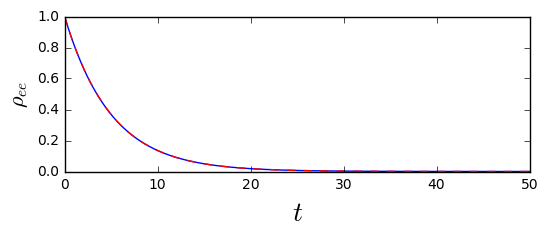

In [327]:
#Since our initial state was the excited state, we can get the probability of being in the excited state
#at time t with:
Pe = expect(result.states, psi0*psi0.dag())

#we can compare this to our analytical result
PeAna = [np.exp(-2 * gamma * t) for t in tlist]


fig, axes = plt.subplots(1,1, figsize=(6,2))
axes.plot(tlist, Pe)
axes.plot(tlist, PeAna, color='r',ls='--')
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"$\rho_{ee}$", fontsize=16);

If we assume non-zero temperature, the steady state (the long-time solution) of the master equation predicts a thermal state.

Analytically, setting the LHS of our equaitons to zero, and soliving, gives the disribution:

$$\rho_{ee} = \frac{n}{(1+2n)}$$
$$\rho_{gg} = \frac{1+n}{(1+2n)}$$

Which is equivalent to the thermal distribution:

$$ \rho = e^{H_S/k_B T}/Z $$


Lets check this two ways in QuTiP.  First with steadystate() function, then with the thermal_dm() function

In [328]:
gamma = 0.1
n_th = 0.5

c_ops = [np.sqrt(2 * gamma * n_th) * sp, np.sqrt(2 * gamma*(n_th + 1)) * sm]

rhoss = steadystate(H,c_ops)
print(rhoss)



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.25  0.  ]
 [ 0.    0.75]]


In [329]:
#Compare to analytical prediction
print(n_th / (1+ 2 * n_th))
print((1+n_th) / (1+ 2 * n_th))

0.25
0.75


In [331]:
#Built in function to calculate thermal state with occupation n_th
print(thermal_dm(2, n_th))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.75  0.  ]
 [ 0.    0.25]]


Let us try a slightly more interesting example, the **Jaynes-Cumming Model** of cavity QED, which describes a single two level system coherently interacting with a single-mode cavity

<img src="QED.png" width=400 height=400/>

The interaction between the TLS and the cavity is coherent, while the losses are incoherent.

Normally, one must fully rederive the master equation, as the Hamiltonian of the system is now different.

However, if $g$ is small compared to the cavity and "atom" frequencies, we can assume that derivation for uncoupled systems is still valid (i.e., the eigenstates and eigenenergies dont change much).



$$H_S = \frac{\epsilon}{2} \sigma_z + \omega_c a^{\dagger}a + g(\sigma_+ a+\sigma_- a^{\dagger})$$

$$ g \ll \epsilon, \omega_c$$



If we assume both atom and cavity are weakly coupled to independant environments (external EM modes, leaky mirror, etc), we can model this system with the following Lindblad Master Equation 

$$\frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] \\
+ \gamma \left[2\sigma_- \rho_S(t)\sigma_+ - \{\sigma_+\sigma_-,\rho_S\}\right] \\
+ \kappa \left[2a \rho_S(t)a^{\dagger} - \{a^{\dagger}a,\rho_S\}\right] $$

As with the atom, the cavity can decay into its environment even at zero temperature.

(Note we assumed zero temperature, for simplicity, and that the rates are "flat", so not really dependant on energy)



In QuTiP, we use the tensor function to create operators for composite systems, thus the operators and Hamiltonian of the above example are defined as

In [333]:
# cavity mode operator.  We truncate the Fock states at "4"
N=4
a = tensor(destroy(N), qeye(2))

# qubit/atom operators
sz = tensor(qeye(N), sigmaz())   # sigma-z operator
sm = tensor(qeye(N), destroy(2).dag()) # sigma-minus operator

In [334]:
#We define system paramaters and the Hamiltonian in the same way as before

wc = 1.0 # cavity frequency
eps = 1.0 # qubit/atom frenqency
g = 0.05  # coupling strength

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a + 0.5 * eps * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.5         0.          0.          0.05        0.          0.          0.
   0.        ]
 [ 0.         -0.5         0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.5         0.          0.          0.07071068
   0.          0.        ]
 [ 0.05        0.          0.          0.5         0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          2.5         0.          0.
   0.08660254]
 [ 0.          0.          0.07071068  0.          0.          1.5         0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.          3.5
   0.        ]
 [ 0.          0.          0.          0.          0.08660254  0.          0.
   2.5       ]]

Again, we can create operators that describe the Lindblad master equation



$$\gamma \left[2\sigma_- \rho_S(t)\sigma_+ - \{\sigma_+\sigma_-,\rho_S\}\right] \\$$

In [335]:
gamma = 0.005
c_ops = []
c_ops.append(np.sqrt(2 * gamma) * sm)

And for the photon loss:

$$\kappa \left[2a \rho_S(t)a^{\dagger} - \{a^{\dagger}a,\rho_S\}\right]$$

In [336]:
kappa = 0.005
c_ops.append(np.sqrt(2 * kappa) * a)

In [339]:
# intial state, lets start with an excited atom and no photons
psi0 = tensor(basis(N,0), basis(2,0))   

tlist = np.linspace(0,100,501)
output = mesolve(H, psi0, tlist, c_ops, [])

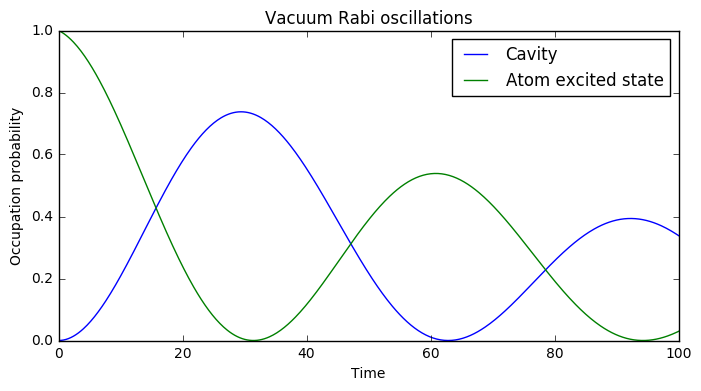

In [340]:
n_c = expect(output.states, a.dag()*a)
n_a = expect(output.states, sm.dag()*sm)

fig, axes = plt.subplots(1, 1, figsize=(8,4))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

We can plot the Wigner function of the cavity with built in functions:

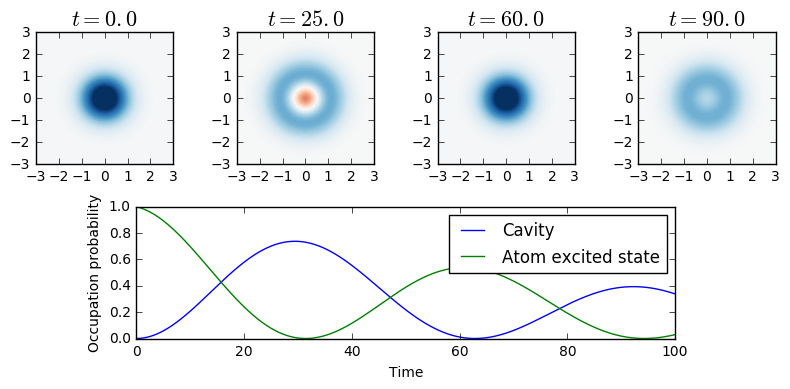

In [341]:
# We can plot the Wigner function of the cavity with built in functions

import matplotlib as mpl

t_idx = np.where([tlist == t for t in [0.0, 25.0, 60, 90]])[1]
rho_list = np.array(output.states)[t_idx]

fig_grid = (2, len(rho_list)*2)
fig = plt.figure(figsize=(2*len(rho_list),4))
xvec = np.linspace(-3,3,200)

for idx, rho in enumerate(rho_list):
    rho_cavity = ptrace(rho, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % tlist[t_idx][idx], fontsize=16)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(tlist, n_c, label="Cavity")
ax.plot(tlist, n_a, label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability');
fig.tight_layout()
fig.savefig("wigner1.png")

<img src="wigner1.png" width=600 height=600/>

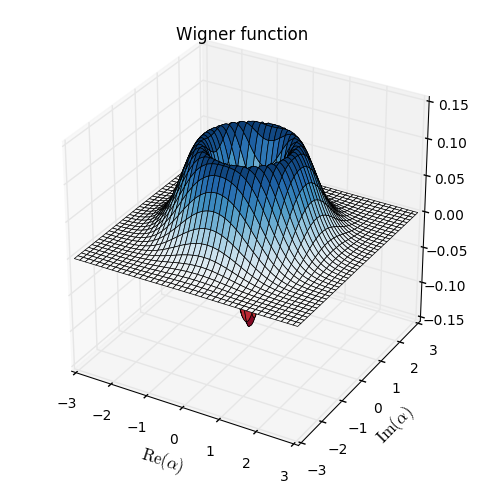

In [21]:
plot_wigner(ptrace(rho_list[1],0), figsize=(6,6),projection='3d', alpha_max=3);

# Monte-Carlo solutions

One downside to solving the master equation in this way is that the size of the matrix of equations we have to construct and solve scales as $N^2$, where $N$ is the number of states in the Hilbert space.

Another approach is to "unravel" the master equation as a sum of trajectories, and then solve a stochastic equation for the state vector  state $\left|\psi(t)\right>$, instead of the density matrix.  Physically this corresponds to continously monitoring the environment, and conditioning the information about the system we gain.



For a quantum system that interacts with its environment. The dynamics of the wave function is given by the Schrodinger equation,

<center>
$\displaystyle\frac{d}{dt}\left|\psi(t)\right> = - i H_{\rm eff} \left|\psi(t)\right>$
</center>

where the Hamiltonian is an effective Hamiltonian that, in addition to the system Hamiltonian $H_S$, also contains a non-Hermitian contribution due to the interaction with the environment:

<center>
$\displaystyle H_{\rm eff}(t) = H - \frac{i}{2}\sum_n c_n^\dagger c_n$
</center>

where $c_n$ are the collapse operators that we usually put in the Lindblad Master equation (and by definition we have included the rates in the operators).



Since the effective Hamiltonian is non-Hermitian, the norm of the wavefunction is decreasing with time, which to first order in a small time step $\delta t$ is given by $\langle\psi(t+\delta t)|\psi(t+\delta t)\rangle \approx 1 - \delta p\;\;\;$, where 

<center>
$\displaystyle \delta p = \delta t \sum_n \left<\psi(t)|c_n^\dagger c_n|\psi(t)\right>$
</center>



The decreasing norm is used to determine when so-called quantum jumps are to be imposed on the dynamics.  This corresponds to observing a photon being emitted into the environment, in which case we apply a "quantum jump", so that the new wavefunction at $t+\delta t$ is given by
<center>
$\left|\psi(t+\delta t)\right> = c_n \left|\psi(t)\right>/\left<\psi(t)|c_n^\dagger c_n|\psi(t)\right>^{1/2}$ 
</center>

In practise we compare $\delta p$ to a random number in the range [0, 1]. If the norm has decreased below the randomly chosen number, we apply the quantum jump for a randomly chosen collapse operator $c_n$, weighted so the probability that the collapse being described by the nth collapse operator is given by
    
<center>
$\displaystyle P_n = \left<\psi(t)|c_n^\dagger c_n|\psi(t)\right>/{\delta p}$ 
</center>

In [356]:
ntraj = [1, 5, 15, 904] # list of number of trajectories to avg. over

mc = mcsolve(H, psi0, tlist, c_ops, [a.dag()*a], ntraj)



10.1%. Run time:  16.02s. Est. time left: 00:00:02:23
20.0%. Run time:  16.70s. Est. time left: 00:00:01:06
30.1%. Run time:  17.63s. Est. time left: 00:00:00:40
40.0%. Run time:  18.33s. Est. time left: 00:00:00:27
50.0%. Run time:  19.03s. Est. time left: 00:00:00:19
60.1%. Run time:  19.80s. Est. time left: 00:00:00:13
70.0%. Run time:  20.43s. Est. time left: 00:00:00:08
80.1%. Run time:  21.09s. Est. time left: 00:00:00:05
90.0%. Run time:  21.75s. Est. time left: 00:00:00:02
100.0%. Run time:  22.39s. Est. time left: 00:00:00:00
Total run time:  22.50s


<img src="monte.png" width=400 height=400/>

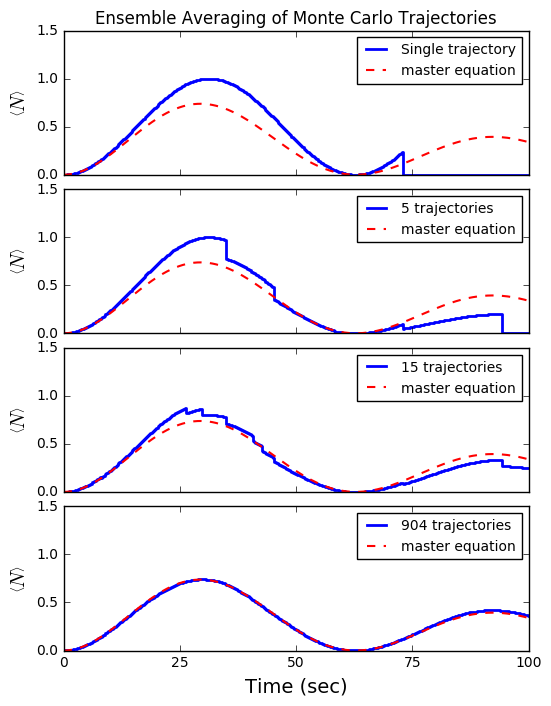

In [357]:
import matplotlib.font_manager
leg_prop = matplotlib.font_manager.FontProperties(size=10)

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(6,8))

fig.subplots_adjust(hspace=0.1) # reduce space between plots

for idx, n in enumerate(ntraj):

    axes[idx].step(tlist, mc.expect[idx][0], 'b', lw=2)
    axes[idx].plot(tlist, expect(output.states,a.dag()*a), 'r--', lw=1.5)
    
    
    axes[idx].set_yticks(np.linspace(0, 2, 5))
    axes[idx].set_ylim([0, 1.5])
    axes[idx].set_ylabel(r'$\left<N\right>$', fontsize=14)
    
    if idx == 0:
        axes[idx].set_title("Ensemble Averaging of Monte Carlo Trajectories")
        axes[idx].legend(('Single trajectory', 'master equation', 'steady state'), prop=leg_prop)
    else:
        axes[idx].legend(('%d trajectories' % n, 'master equation', 'steady state'), prop=leg_prop)
        

axes[3].xaxis.set_major_locator(plt.MaxNLocator(4))
axes[3].set_xlabel('Time (sec)',fontsize=14);
fig.savefig("monte.png")

## Monte Carlo Master Equation: a quick summary

- For small systems, its actually slower than a direct solution, but for large systems it can save memory


<img src="qutipbench.png" width=400 /> <img src="qutipbenchcaption.png" width=400/>

## Monte Carlo Master Equation: a quick summary

- For small systems, its actually slower than a direct solution, but for large systems it can save memory
- Easy to run in parrallel, using multiple cores, etc.
- It can give an intuitive picture of measurement.  
- Stochastic master equations for arbitrary unravellings are supported in QuTiP.  
- These can be used to model continous homodyne and heterodyne measurement, feedback, etc.

## Other reasons to use QuTiP

- Open source science
- Promotes reproducibility
- Has even more functionality, including 
    - Quantum optimal control library (CRAB, GOAT, and other animals)
    - QIP library
    - functions to calculate spectra, counting statistics, etc
    - Supports arbitrary time-dependance, in Hamiltonian and Lindblad collapse operators
    - Active development community.

    
## Part 3


- Beyond the Master Equation: Exact numerical methods for bosonic baths

    - The Hierarchy Equations of Motion, Tanimura and Ueda, (1989)
    
    - The Reaction Coordinate, Illes-Smith, Lambert and Nazir, PRA, (2014)
    
    
- Conclusions 

# Non-Markovian systems

In some situations the assumption that $\tau_E \ll \tau_S, \tau_R$ breaks down. E.g.,

- Hyperfine Interaction between electron spins and nuclear spins in quantum dots 
- Superconducting qubits strongly coupled to open transmission lines
- Molecular systems strongly interacting with their environment, e.g., energy transfer in photosynthetic complexes strongly couples to protein "vibrations".


A recent review:
"Dynamics of non-Markovian open quantum systems"
Inés de Vega and Daniel Alonso
Rev. Mod. Phys. 89, 015001

# Bosonic environments

The choice of a bosonic environment, or in general, a Gaussian environment, simplifies the problem to some degree.

Using the fact that the cumulants of a <span style="color:red">Gaussian</span> system truncate at second order, one can show (see Breur and Petruccione, 3.6.4, or Jian Ma et al, PRA 2012) that there is a formal solution (assuming that at $t=0$, $\rho(0) = \rho_S(0)\otimes \rho_E(0)$ ),





$$ \tilde{\rho}_S(t) = \mathcal{T} \exp\left( - \int_0^t dt_2 \int_0^{t_2} A^{\times}(t_2)[C^R(t_2-t_1) A(t_1)^{\times} + i C^I(t_2-t_1)A(t_1)^{\circ}]\right) $$

Where, as before $A(t)$ is the system operator which couples to the environment, 

$C(t)$ is the correlation function of the environment, split into real and imaginary parts, 

$A^{\times}B \equiv [A,B]$ and $A^{\circ}B = \{A,B\}$.  

$\mathcal{T}$ is the time-ordering operator, which means that all terms have to reordered so that time arguments increase from right to left.


Directly solving or using this equation is intractable;  however, by assuming that we can write the correlation functions as a sum of exponentials, and taking repeated time-derivatives, one can derive the <span style="color:red">hierarchy equations of motion.</span>

Again assuming that the initial bath state is a thermal state, and recalling that 

$$J(\omega) = \sum_k g_k^2\delta(\omega-\omega_k)$$


$$C(t)= \int_0^{\infty}d\omega \{J(\omega) e^{i\omega t}n(\omega)+ J(\omega) e^{-i\omega t}[1+n(\omega)]\}$$

we can rewrite  this as

$$C(t)= \int_0^{\infty}d\omega J(\omega)\left[ \mathrm{coth}\left(\frac{\beta\omega}{2}\right)\cos \left(\omega t\right) - i \sin \left(\omega t)\right)\}\right]$$

$\beta = 1/ k_B T$, the temperature of the initial environment state.



For some choices of spectral density, this does have the analytical form of a sum of exponentials, e.g. a Lorentzian.  Traditionally, the Drude-Lorentz form is chosen,

$$J(\omega) = \frac{\omega}{\pi} \frac{2\lambda \gamma}{(\gamma^2 + \omega^2)} $$
 
Inserting this into $C(\tau)$ one finds,



$$C(\tau) = \sum_{k=0}^{\infty} c_k e^{-v_k|\tau|}$$


Where $v_k = 2 \pi k/\beta$ for $k\geq1$, and $v_0 = \gamma$, and $c_0 = \lambda \gamma [-i + \mathrm{cot}\left(\beta \gamma /2\right)]$ and $c_k = (4 \lambda \gamma/\beta) v_k/(v_k^2 - \gamma^2)$


In [23]:
def cot(x):
    return 1./np.tan(x)

E.g., for $\gamma = 1.0$, $\lambda = 1.25$, $\beta = 0.95$:


<img src="drude.png" width=800 /> 

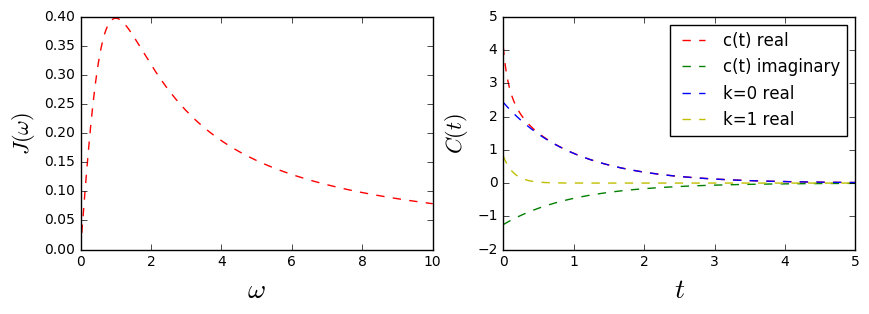

In [359]:
#A quick plot of the spectral density and environment correlation functions

gamma = 1.0

lam = 2.5/2.

T = 1/0.95

wlist = np.linspace(0, 10, 1000)
tlist = np.linspace(0, 5, 1000)
J = [w * 2 * lam * gamma / (np.pi*(gamma**2 + w**2)) for w in wlist]

def c(t):
    c_temp =[]
    c_temp.append(lam * gamma * (-1.0j + cot(gamma / (2 * T))) * np.exp(-gamma * t))
    for k in range(1,5):
        vk = 2 * np.pi * k * T
        c_temp.append( (4 * lam * gamma * T * vk / (vk**2 - gamma**2))  * np.exp(- vk * t) ) 
    return c_temp

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,3))

fig.subplots_adjust(hspace=0.1) # reduce space between plots



axes[0].plot(wlist, J, color='r',ls='--')
axes[0].set_xlabel(r'$\omega$', fontsize=20)
axes[0].set_ylabel(r"$J(\omega)$", fontsize=16);


axes[1].plot(tlist, [np.real(sum(c(t))) for t in tlist], color='r',ls='--',label="c(t) real")
axes[1].plot(tlist, [np.imag(sum(c(t))) for t in tlist], color='g',ls='--',label="c(t) imaginary")
axes[1].plot(tlist, [c(t)[0] for t in tlist], color='b',ls='--',label="k=0 real")
axes[1].plot(tlist, [c(t)[1] for t in tlist], color='y',ls='--',label="k=1 real")
axes[1].set_xlabel(r'$t$', fontsize=20)
axes[1].set_ylabel(r"$C(t)$", fontsize=16);

axes[1].legend(loc=0)

fig.savefig("drude.png")

Given these assumptions (<span style="color:red">seperable initial condition, bosonic environment initially in a thermal state</span>), one can derive the hierachy, which looks like the following

$$\dot{\rho}^n(t) = -(iH_S^{\times} + \sum_{k=0}^M\, n_k \,v_k)\,\rho^{n}(t)$$
$$ - i \sum_{k=0}^M\, A^{\times}\, \rho^{n^+_k}(t)$$
$$ -i  \sum_{k=0}^M n_k(c_k\, A\,\rho^{n^-_k}(t) - c_k^*\,\rho^{n^-_k}(t)\, A)$$

This is a set of coupled equations for a hierarchy of "density matrices" labelled by an index $n$.  

In this case $n = \{n_1,n_2,..n_m,...,n_M\}$: itcontains M indices, $0$ to $M$, a cut-off in the number of exponentials.  

Each element runs from $0$ to $N_c$, an additional cut-off term.

$n^+_k$ means one increases the $k$th component of $n_k$ by $1$, while  $n^-_k$ means decrease by $1$.

$n= \{0,0,0,..0\}$ denotes the physical density matrix. All the rest are "auxiliary" non-normalized density matrices.

# Comparing BMS master equation and the HEOM

Lets try and see the breakdown of the BMS master equation as we increase the bath correlation time

First try lets try some parameters where BMS should work, $\gamma=10 \epsilon$, $\lambda = 0.05 \epsilon$, $\beta = \epsilon$.

In [514]:
eps = 1.0    # Tunnelling term
Hsys =  0.5 * eps * sigmaz()
#Coupling operator to the bath:
sm = destroy(2).dag()
Q = sigmax()


gamma = 10.                # Cutoff frequency of DL spectral density
lam = 0.05           # Coupling strength of DL spectral density

temperature = 1.     # Temperature of environment

tlist = np.linspace(0, 20, 800) #time steps

psi0=(basis(2,0)+basis(2,1))/np.sqrt(2.)  #initial state of system.
rho0=psi0*psi0.dag()

Ncut = 10
#K is the matsubara terms; if temperature < system energy,  N>1
Nk=4


In [515]:
def J0(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma * (energy)/(np.pi * ((energy**2) + (gamma**2)))
def nbs(energy,Temperature):
    beta=1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)




The relaxation time is roughly 
$\tau_R \approx 1/\pi J(\epsilon)n(\epsilon)$


In [516]:
print 1/(np.pi * J0(1.0) * nbs(1.0,temperature))


173.546464674


The largest environment correlation times are
$\tau_E \approx 1/\gamma,  1/2 \pi k_B T $

In [520]:
print 1/gamma
print 1/(2 * np.pi * temperature)

0.1
0.159154943092


The system time scale is $\tau_S \approx 1/\epsilon$, so $\tau_E \ll \tau_S \ll \tau_R$ for the Born-Markov-Secular approximation seems valid. Let's check..

In [521]:
# Configure the solver
from qutip.nonmarkov.heom import HSolverDL
hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, gamma, stats=True,)
resultHEOM = hsolver.run(rho0, tlist)

In [524]:
#lets compare to the BMS solution,
 
resultMEsec = mesolve(Hsys, rho0, tlist, [np.sqrt(2*np.pi*J0(1.0)*(nbs(1.0,temperature)+1))*sm,np.sqrt(2*np.pi*J0(1.0)*nbs(1.0,temperature))*sm.dag()], [])
resultMEnonsec = Lnonsec(Hsys, Q, tlist, rho0, temperature, [])
    


<img src="heom1.png" width=800 /> 

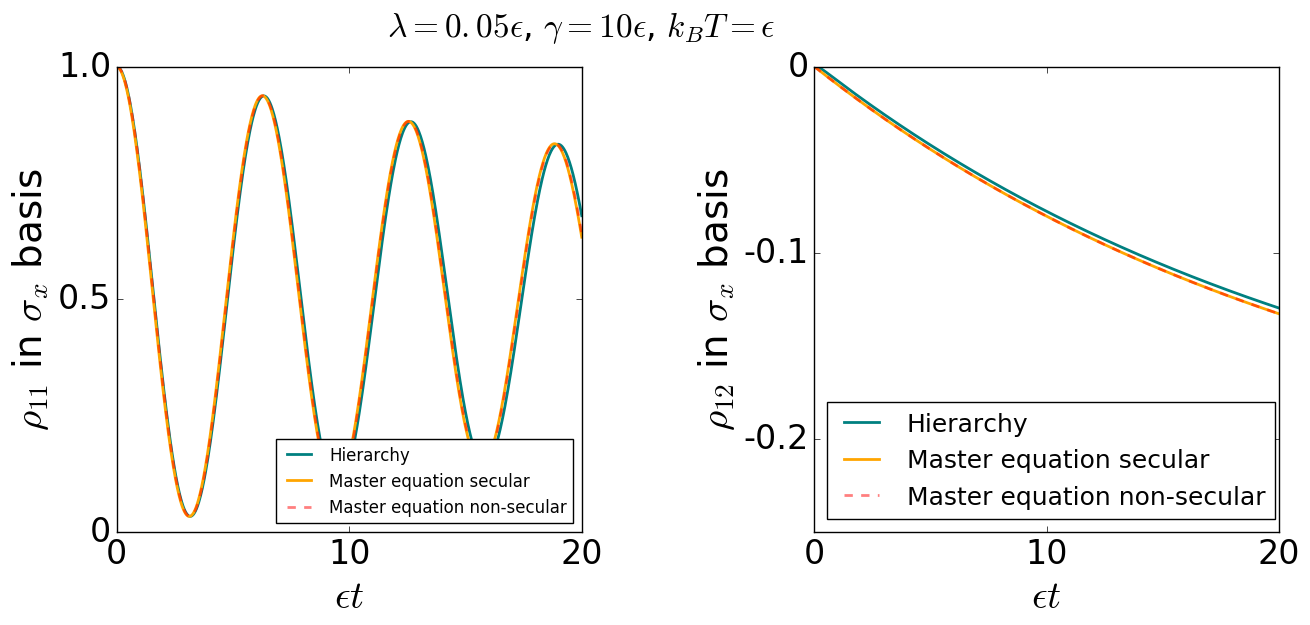

In [523]:
P1p=rho0
psi01 = (basis(2,0)-basis(2,1))/np.sqrt(2.)
P12p=psi0*psi01.dag()

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)


P1ME=expect(resultMEsec.states,P1p)
P12ME=expect(resultMEsec.states,P12p)
import matplotlib.gridspec as gridspec

P1MENS=expect(resultMEnonsec.states,P1p)
P12MENS=expect(resultMEnonsec.states,P12p)

fig = plt.figure(figsize=(15,6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=.5, hspace=1.3) # set the spacing between axes. 
########################################################################
axes1 = plt.subplot(gs1[0])



axes1.plot(tlist, P1HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes1.plot(tlist , P1ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes1.plot(tlist , P1MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes1.set_ylabel(r'$\rho_{11}$ in $\sigma_x$ basis', fontsize=28)
axes1.set_xlabel(r'$\epsilon t$', fontsize=28)

ticks = [0,0.5,1.0]
axes1.set_yticks(ticks)
axes1.set_yticklabels(["0","0.5","1.0"], fontsize=24);

ticks = [.0,10.,20.]
axes1.set_xticks(ticks)
axes1.set_xticklabels(["0","10","20"], fontsize=24);
axes1.legend(loc=4, fontsize=12)

axes1.set_title('$\lambda=0.05 \epsilon $, $\gamma = 10 \epsilon $, $k_{B}T=\epsilon $ ',fontsize=24,y=1.05,x=1.0)

axes2 = plt.subplot(gs1[1])

axes2.plot(tlist, P12HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes2.plot(tlist , P12ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes2.plot(tlist , P12MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes2.set_xlabel(r'$\epsilon t$', fontsize=28)
axes2.set_ylabel(r'$\rho_{12}$ in $\sigma_x$ basis', fontsize=28)

ticks = [0,-.1,-.2]
axes2.set_yticks(ticks)
axes2.set_yticklabels(["0","-0.1","-0.2"], fontsize=24);

ticks = [.0,10.,20.]
axes2.set_xticks(ticks)
axes2.set_xticklabels(["0","10","20"], fontsize=24);

#axes1.set_xlim(-1.2, 1.2);
axes2.set_ylim(-0.25,0.);

axes2.legend(loc=0, fontsize=18)


fig.savefig("heom1.png")


Next try lets try some parameters where BMS should break, $\gamma=0.1 \epsilon$, $\lambda = 0.2 \epsilon$, $\beta = \epsilon$.

In [526]:
eps = 1.0    # Tunnelling term
Hsys =  0.5 * eps * sigmaz()
#Coupling operator to the bath:
sm = destroy(2).dag()
Q = sigmax()


gamma = .1                # Cutoff frequency of DL spectral density
lam = 0.2           # Coupling strength of DL spectral density

temperature = 1.     # Temperature of environment

tlist = np.linspace(0, 20, 800) #time steps

psi0=(basis(2,0)+basis(2,1))/np.sqrt(2.)  #initial state of system.
rho0=psi0*psi0.dag()

Ncut = 25
#K is the matsubara terms; if temperature < system energy,  N>1
Nk=3


In [527]:
def J0(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma * (energy)/(np.pi * ((energy**2) + (gamma**2)))
def nbs(energy,Temperature):
    beta=1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)




The relaxation time is roughly 
$\tau_R \approx 1/\pi J(\epsilon)n(\epsilon)$


In [528]:
print 1/(np.pi*J0(1.0)*nbs(1.0,temperature))


43.3866161686


The largest environment correlation times are
$\tau_E \approx 1/\gamma,  1/2 \pi k_B T $

In [529]:
print 1/gamma
print 1/(2 * np.pi * temperature)

10.0
0.159154943092


The system time scale is $\tau_S \approx 1/\epsilon$, so $\tau_S \ll \tau_R$ seems ok, but now $\tau_E > \tau_S$, so Markov approximation should break

In [372]:
# Configure the solver
from qutip.nonmarkov.heom import HSolverDL
hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, gamma, stats=True)
resultHEOM = hsolver.run(rho0, tlist)

In [373]:
#lets compare to the BMS solution,
 
resultMEsec = mesolve(Hsys, rho0, tlist, [np.sqrt(2*np.pi*J0(1.0)*(nbs(1.0,temperature)+1.))*sm,np.sqrt(2*np.pi*J0(1.0)*nbs(1.0,temperature))*sm.dag()], [])
resultMEnonsec = Lnonsec(Hsys, Q, tlist, rho0, temperature, [])


<img src="heom2.png" width=800 />

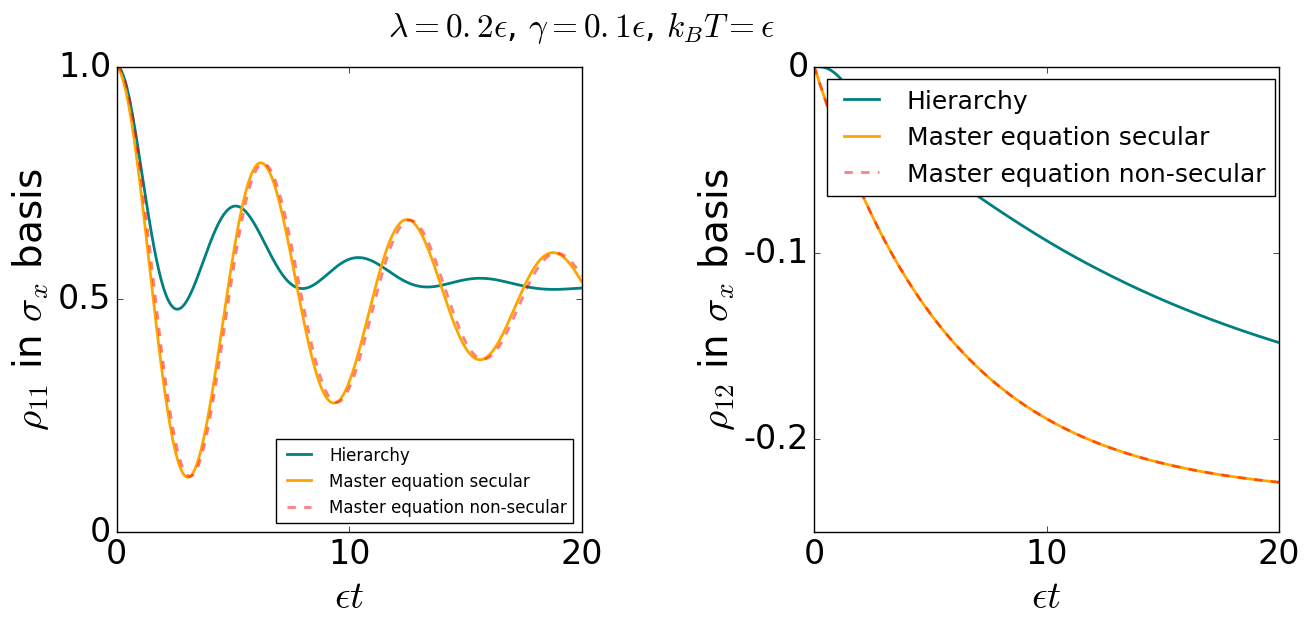

In [374]:

P1p=rho0
psi01 = (basis(2,0)-basis(2,1))/np.sqrt(2.)
P12p=psi0*psi01.dag()

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)


P1ME=expect(resultMEsec.states,P1p)
P12ME=expect(resultMEsec.states,P12p)


P1MENS=expect(resultMEnonsec.states,P1p)
P12MENS=expect(resultMEnonsec.states,P12p)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,6))

gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=.5, hspace=1.3) # set the spacing between axes. 
########################################################################
axes1 = plt.subplot(gs1[0])

axes1.plot(tlist, P1HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes1.plot(tlist , P1ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes1.plot(tlist , P1MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")



axes1.set_ylabel(r'$\rho_{11}$ in $\sigma_x$ basis', fontsize=28)
axes1.set_xlabel(r'$\epsilon t$', fontsize=28)

ticks = [0,0.5,1.0]
axes1.set_yticks(ticks)
axes1.set_yticklabels(["0","0.5","1.0"], fontsize=24);

ticks = [.0,10.,20.]
axes1.set_xticks(ticks)
axes1.set_xticklabels(["0","10","20"], fontsize=24);

axes1.legend(loc=4, fontsize=12)



axes1.set_title('$\lambda=0.2 \epsilon$, $\gamma = 0.1 \epsilon$, $k_{B}T=\epsilon $ ',fontsize=24,y=1.05,x=1.0)



axes2 = plt.subplot(gs1[1])


axes2.plot(tlist, P12HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes2.plot(tlist , P12ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes2.plot(tlist , P12MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes2.set_xlabel(r'$\epsilon t$', fontsize=28)
axes2.set_ylabel(r'$\rho_{12}$ in $\sigma_x$ basis', fontsize=28)

ticks = [0,-.1,-.2]
axes2.set_yticks(ticks)
axes2.set_yticklabels(["0","-0.1","-0.2"], fontsize=24);

ticks = [.0,10.,20.]
axes2.set_xticks(ticks)
axes2.set_xticklabels(["0","10","20"], fontsize=24);

#axes1.set_xlim(-1.2, 1.2);
axes2.set_ylim(-0.25,0.);

axes2.legend(loc=0, fontsize=18)



fig.savefig("heom2.png")


Next try lets try some parameters where secular approximation should break, but Born-Markov is ok $\gamma=10 \epsilon$, $\lambda = 0.5 \epsilon$, $\beta = 0.25\epsilon$.

In [530]:
eps = 1.0    # Tunnelling term
Hsys =  0.5 * eps * sigmaz()
#Coupling operator to the bath:
sm = destroy(2).dag()
Q = sigmax()


gamma = 10.                # Cutoff frequency of DL spectral density
lam = .5           # Coupling strength of DL spectral density

temperature = 4.     # Temperature of environment

tlist = np.linspace(0, 20, 800) #time steps

psi0=(basis(2,0)+basis(2,1))/np.sqrt(2.)  #initial state of system.
#psi0=basis(2,0)  #initial state of system.
rho0=psi0*psi0.dag()

Ncut = 20
#K is the matsubara terms; if temperature < system energy,  N>1
Nk=3


In [531]:
def J0(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma * (energy)/(np.pi * ((energy**2) + (gamma**2)))
def nbs(energy,Temperature):
    beta=1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)

#spectral density/w at w=0
def J02(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma /(np.pi * ((gamma**2)))




The relaxation time is roughly 
$\tau_R \approx 1/\pi J(\epsilon)n(\epsilon)$


In [532]:
print 1/(np.pi*J0(1.0)*(nbs(1.0,temperature)+1.))


2.23411209098


The largest environment correlation times are
$\tau_E \approx 1/\gamma,  1/2 \pi k_B T $

In [533]:
print 1/gamma
print 1/(2 * np.pi * temperature)

0.1
0.039788735773


The system time scale is $\tau_S \approx 1/\epsilon$, so now $\tau_R \approx \tau_S$, so Secular appoximation should break

In [535]:
# Configure the solver
from qutip.nonmarkov.heom import HSolverDL
hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, gamma, stats=True)
resultHEOM = hsolver.run(rho0, tlist)

In [539]:
#lets compare to the BMS solution,
 
resultMEsec = mesolve(Hsys, rho0, tlist, [np.sqrt(2*np.pi*J0(1.0)*(nbs(1.0,temperature)+1.))*sm,np.sqrt(2*np.pi*J0(1.0)*nbs(1.0,temperature))*sm.dag()], [])
resultMEnonsec = Lnonsec(Hsys, Q, tlist, rho0, temperature, [])


<img src="heom4.png" width=800 />

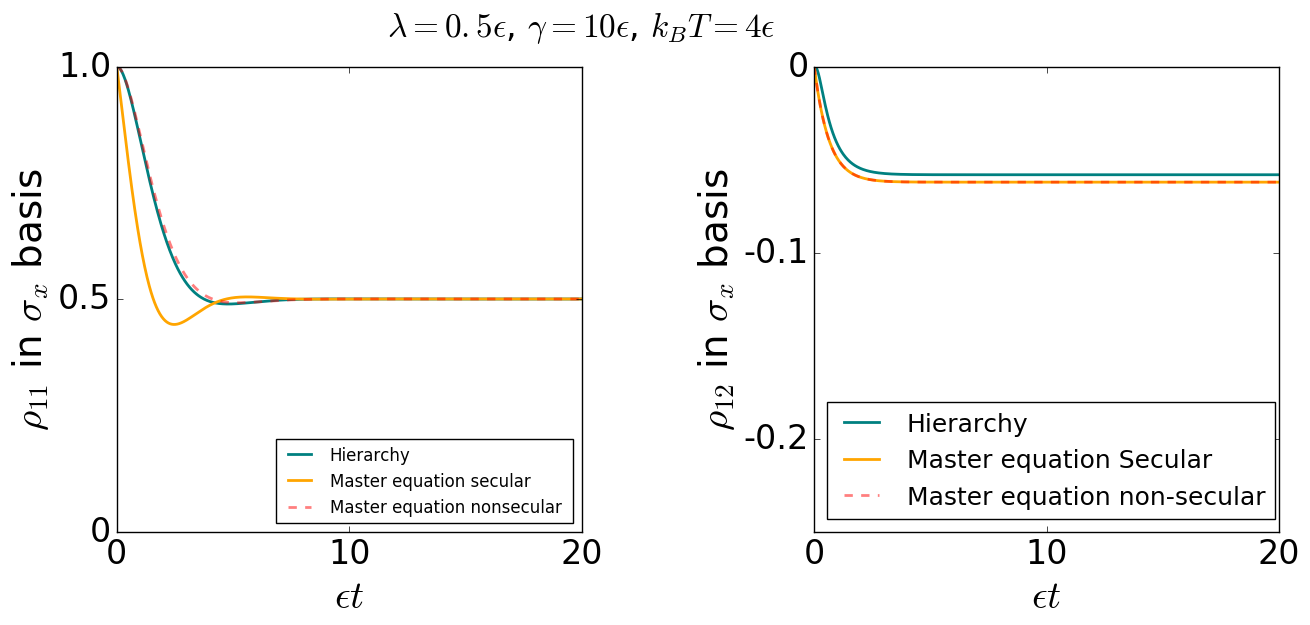

In [541]:

P1p=rho0
psi01 = (basis(2,0)-basis(2,1))/np.sqrt(2.)

P12p=psi0*psi01.dag()

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)


P1ME=expect(resultMEsec.states,P1p)
P12ME=expect(resultMEsec.states,P12p)


P1MENS=expect(resultMEnonsec.states,P1p)
P12MENS=expect(resultMEnonsec.states,P12p)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,6))

gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=.5, hspace=1.3) # set the spacing between axes. 
########################################################################
axes1 = plt.subplot(gs1[0])

axes1.plot(tlist, P1HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes1.plot(tlist , P1ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes1.plot(tlist , P1MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation nonsecular ")



axes1.set_ylabel(r'$\rho_{11}$ in $\sigma_x$ basis', fontsize=28)
axes1.set_xlabel(r'$\epsilon t$', fontsize=28)

ticks = [0,0.5,1.0]
axes1.set_yticks(ticks)
axes1.set_yticklabels(["0","0.5","1.0"], fontsize=24);

ticks = [.0,10.,20.]
axes1.set_xticks(ticks)
axes1.set_xticklabels(["0","10","20"], fontsize=24);

axes1.legend(loc=4, fontsize=12)



axes1.set_title('$\lambda=0.5 \epsilon$, $\gamma = 10 \epsilon$, $k_{B}T=4\epsilon $ ',fontsize=24,y=1.05,x=1.0)



axes2 = plt.subplot(gs1[1])


axes2.plot(tlist, P12HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes2.plot(tlist , P12ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation Secular")
axes2.plot(tlist , P12MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes2.set_xlabel(r'$\epsilon t$', fontsize=28)
axes2.set_ylabel(r'$\rho_{12}$ in $\sigma_x$ basis', fontsize=28)

ticks = [0,-.1,-.2]
axes2.set_yticks(ticks)
axes2.set_yticklabels(["0","-0.1","-0.2"], fontsize=24);

ticks = [.0,10.,20.]
axes2.set_xticks(ticks)
axes2.set_xticklabels(["0","10","20"], fontsize=24);

#axes1.set_xlim(-1.2, 1.2);
axes2.set_ylim(-0.25,0.);

axes2.legend(loc=0, fontsize=18)



fig.savefig("heom4.png")


# The HEOM and FMO

The HEOM method became slightly more famous after being applied to the Fenna-Matthews-Olsen complex (Ishizaki and Fleming, PNAS, 2009).

<img src="fmo.png" width=600/>

Figure adapted from N. Lambert et al., Nat. Phys. (2013)

# The HEOM and FMO

In a minimal model, we can write the Hamiltonian of the $7$ sites as,

$$ H = \sum_{j=1}^7 \epsilon_j |j\rangle\langle j| + \sum_{j,j'} J_{j,j'} \left(|j\rangle \langle j'| + c.c \right)$$

This can be reconstructed via a combination of ab initio model and spectroscopy to be, e.g., 


In [166]:
#Multiple by h*c*100 to get joules from inverse centimeters
idFMO = Qobj([[200, -87.7, 5.5, -5.9, 6.7, -13.7, -9.9],
                    [-87.7, 320, 30.8, 8.2, 0.7, 11.8, 4.3],
                    [5.5, 30.8, 0, -53.5, -2.2, -9.6, 6.0],
                    [-5.9, 8.2, -53.5, 110, -70.7, -17.0, -63.3],
                    [6.7, 0.7, -2.2, -70.7, 270, 81.1, -1.3],
                    [-13.7,11.8, -9.6, -17.0 ,81.1, 420, 39.7],
                    [-9.9, 4.3, 6.0, -63.3, -1.3, 39.7, 230]])
idFMO

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[ 200.   -87.7    5.5   -5.9    6.7  -13.7   -9.9]
 [ -87.7  320.    30.8    8.2    0.7   11.8    4.3]
 [   5.5   30.8    0.   -53.5   -2.2   -9.6    6. ]
 [  -5.9    8.2  -53.5  110.   -70.7  -17.   -63.3]
 [   6.7    0.7   -2.2  -70.7  270.    81.1   -1.3]
 [ -13.7   11.8   -9.6  -17.    81.1  420.    39.7]
 [  -9.9    4.3    6.   -63.3   -1.3   39.7  230. ]]

Using the HEOM, and assuming the Drude-Lorentz spectral density describes the $7$ independant baths, one finds, e.g., (T = 300 K, $1/\gamma = 166$ fs, $1/\lambda=6.6$ ps)

from A. fruchtman, N. Lambert, E. Gauger, Scientific Reports 2016:

<img src="fmo2.png" />

Dashed lines: HEOM, solid lines: quasi-non-Markov master equation

# Generalizing the spectral density

The Drude-Lorentz spectral density is convenient because we can <span style="color:red">analytically expand it as exponentials </span>.

In other cases, we can <span style="color:red">numerically calculate</span> the correlation functions, and then <span style="color:red">numerically fit</span> them to a sum of exponentials.

As a simple example, we can bench-mark against the analytically solvable "pure dephasing model", i.e., we set the coupling operator equal to the system Hamiltonian 

(see A. fruchtman, N. Lambert, E. Gauger, Scientific Reports 2016 for more interesting examples)

<img src="ohmic.png" />

<img src="superohmic.png" />

# Conclusions

The study of open quantum systems lets us model how a system interacts with it environment in various limits:

- Weak coupling, no bath memory (Markov), and weak damping gives us the Lindblad Born-Markov-Secular master equation
$$\tau_E \ll \tau_S \ll \tau_R$$
- We can still solve the non-secular case if need be
$$\tau_E \ll \tau_S, \tau_R$$
- Exact methods (HEOM, reaction coordinate, etc) give insight into strongly correlated system-bath problems

$$\tau_E \approx \tau_S \approx \tau_R$$



In [468]:
#Calculates  generic non-secular master equation


import time
import warnings
import numpy as np
import scipy.sparse as sp
from numpy import matrix
from numpy import linalg
from qutip import spre, spost, sprepost, thermal_dm, mesolve, Odeoptions
from qutip import tensor, identity, destroy, sigmax, sigmaz, basis, qeye, dims
from qutip.ui.progressbar import BaseProgressBar, TextProgressBar
def Lnonsec(Hsys, Q, tlist, initial_state, Temperature,
            return_vals, eigen_sparse=False, options=None,progress_bar=None):
    

    if progress_bar is None:
        progress_bar = BaseProgressBar()
    elif progress_bar is True:
        progress_bar = TextProgressBar()
        
    if options is None:
        options = Options()
    output = None
    
    dot_energy, dot_state = Hsys.eigenstates(sparse=eigen_sparse)
    deltaE = dot_energy[1] - dot_energy[0]
    
    
    #Reaction coordinate hamiltonian/operators
    
    dimensions = dims(Q)
    Nmax = dimensions[1][0]        #hilbert space 
    #Nmax = 2       #hilbert space 
    
    H = Hsys
    L=0
    PsipreEta=0
    PsipreX=0

    all_energy, all_state = H.eigenstates(sparse=eigen_sparse)
    Apre = spre(Q)
    Apost = spost(Q)
    for j in range(Nmax):
        for k in range(Nmax):
            A = Q.matrix_element(all_state[j].dag(), all_state[k])
            #A = sh.matrix_element(all_state[j].dag(), all_state[k])
            delE = (all_energy[j] - all_energy[k])
            if np.absolute(A) > 0.0:
                if abs(delE) > 0.0:
                    #X = (0.5 * np.pi * gamma*(all_energy[j] - all_energy[k])
                    X = (0.5  * np.pi * J0(all_energy[j] - all_energy[k])
                         * (np.cosh((all_energy[j] - all_energy[k]) /
                            (2 * Temperature))
                         / (np.sinh((all_energy[j] - all_energy[k]) /
                            (2 * Temperature)))) * A)
                    #eta = (0.5 * np.pi * gamma *
                    eta = (0.5 *  np.pi *
                           J0(all_energy[j] - all_energy[k]) * A)
                    PsipreX = PsipreX + X * all_state[j]*all_state[k].dag()
                    PsipreEta = PsipreEta + (eta * all_state[j]
                                             * all_state[k].dag())
                else:
                    #X =0.5  * np.pi* J0(0.) * A * 2 * Temperature
                    X =0.5  * np.pi* J02(0.)* A  * 2 * Temperature
                    #X =0.5 * np.pi * gamma * A * 2 * Temperature
                    PsipreX=PsipreX+X*all_state[j]*all_state[k].dag()

    A = Q
    L = ((-spre(A * PsipreX)) + (sprepost(A, PsipreX))
         +(sprepost(PsipreX, A)) + (-spost(PsipreX * A))
         +(spre(A * PsipreEta)) + (sprepost(A, PsipreEta))
         +(-sprepost(PsipreEta, A)) + (-spost(PsipreEta * A)))           

    #Setup the operators and the Hamiltonian and the master equation 
    #and solve for time steps in tlist
    psi0 = ( initial_state)
    output = mesolve(H, psi0, tlist, [L], return_vals, options=options,progress_bar=progress_bar)
    
    return output
              